In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets 
import matplotlib.pyplot as plt

# 1. Định nghĩa class MyPCA

In [4]:
class MyPCA:
    def __init__(self, n_components=None):
        """
        n_components: số thành phần chính muốn giữ lại
        Nếu None thì giữ toàn bộ
        """
        self.n_components = n_components

    def fit(self, X):
        """
        X: mảng numpy shape (n_samples, n_features)
        Tính:
         - self.components_: ma trận (n_components, n_features)
         - self.explained_variance_: vector các trị riêng (n_components,)
         - self.explained_variance_ratio_: EVR (n_components,)
         - self.cumulative_explained_variance_: CEVR (n_components,)
        """
        # 1) Tâm dữ liệu
        self.mean_ = np.mean(X, axis=0)
        Xc = X - self.mean_
        # 2) Ma trận hiệp phương sai
        C = np.cov(Xc, rowvar=False)
        # 3) Tính trị riêng
        eigvals, eigvecs = np.linalg.eigh(C)
        # 4) Sắp xếp giảm dần
        idx = np.argsort(eigvals)[::-1]
        eigvals = eigvals[idx]
        eigvecs = eigvecs[:, idx]
        # 5) Chọn số thành phần
        if self.n_components is not None:
            eigvals = eigvals[:self.n_components]
            eigvecs = eigvecs[:, :self.n_components]
        # 6) Lưu kết quả
        self.components_ = eigvecs.T
        self.explained_variance_ = eigvals
        total_var = np.sum(eigvals)
        self.explained_variance_ratio_ = eigvals / total_var
        self.cumulative_explained_variance_ = np.cumsum(self.explained_variance_ratio_)
        return self

    def transform(self, X):
        """
        Chiếu X lên không gian thành phần chính đã fit trước đó
        """
        Xc = X - self.mean_
        return Xc.dot(self.components_.T)

    def fit_transform(self, X):
        return self.fit(X).transform(X)

# 2. Thử PCA trên Iris dataset

In [5]:
iris = datasets.load_iris()
X_iris = iris.data  # (150,4)
y_iris = iris.target

# Chuẩn hóa (standardize)
X_iris_std = (X_iris - X_iris.mean(axis=0)) / X_iris.std(axis=0)

In [33]:
# xác định số thành phần chính
k = 4

In [34]:
# Áp dụng MyPCA lấy k thành phần
pca_iris = MyPCA(n_components=k)
X2_iris = pca_iris.fit_transform(X_iris_std)


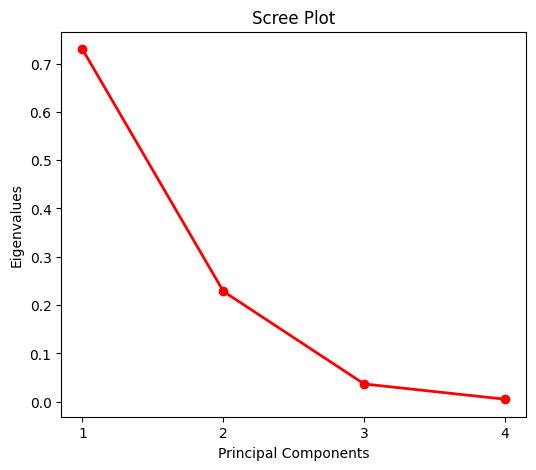

In [35]:
# Scree plot
plt.figure(figsize=(6,5))
plt.plot(pca_iris.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xticks(range(len(pca_iris.explained_variance_ratio_)), range(1, len(pca_iris.explained_variance_ratio_) + 1))
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.show()


In [36]:
# In EVR / CEVR
print("EVR:", pca_iris.explained_variance_ratio_)
print("CEVR:", pca_iris.cumulative_explained_variance_)

EVR: [0.72962445 0.22850762 0.03668922 0.00517871]
CEVR: [0.72962445 0.95813207 0.99482129 1.        ]


# 3. So sánh với PCA của skitlearn

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca_sklearn = PCA(n_components=k)
X2_iris_sklearn = pca_sklearn.fit_transform(X_iris_std)

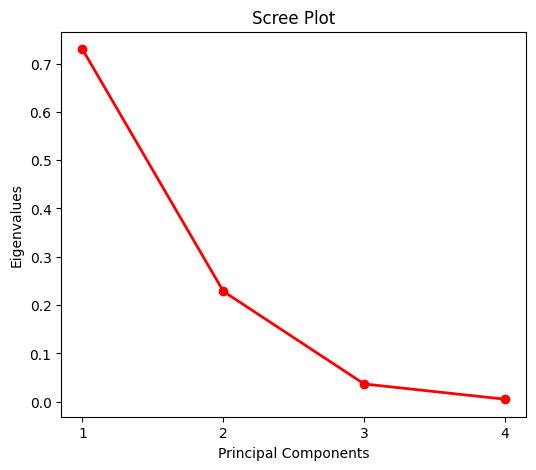

In [39]:
# Scree plot
plt.figure(figsize=(6,5))
plt.plot(pca_sklearn.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xticks(range(len(pca_sklearn.explained_variance_ratio_)), range(1, len(pca_sklearn.explained_variance_ratio_) + 1))
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.show()

In [40]:
# so sanh 2 PCA
print("Sklearn PCA:")
print("EVR:", pca_sklearn.explained_variance_ratio_)
print("CEVR:", np.cumsum(pca_sklearn.explained_variance_ratio_))
print("MyPCA:")
print("EVR:", pca_iris.explained_variance_ratio_)
print("CEVR:", pca_iris.cumulative_explained_variance_)



Sklearn PCA:
EVR: [0.72962445 0.22850762 0.03668922 0.00517871]
CEVR: [0.72962445 0.95813207 0.99482129 1.        ]
MyPCA:
EVR: [0.72962445 0.22850762 0.03668922 0.00517871]
CEVR: [0.72962445 0.95813207 0.99482129 1.        ]


# Dựa trên kết quả so sánh, ta thấy rằng PCA tự cài đặt và PCA của sklearn cho ra các giá trị explained variance ratio (EVR) và cumulative explained variance ratio (CEVR) gần như giống hệt nhau. Điều này cho thấy việc cài đặt PCA thủ công là chính xác và cho kết quả tương đương với thư viện sklearn. Như vậy, ta có thể tin tưởng vào cả hai phương pháp khi áp dụng PCA cho bộ dữ liệu này.
